In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [6]:
# Read the CSV file
ball_df = pd.read_csv('../data/raw/ball_positions.csv')
print(ball_df.columns)

Index(['Frame', ' ball_x', ' ball_y'], dtype='object')


In [8]:
# Strip leading/trailing spaces from column names
ball_df.columns = ball_df.columns.str.strip()

# Debugging: Print the cleaned column names
print("Cleaned Columns:", ball_df.columns)

# Interpolate missing X and Y values
ball_df[['ball_x', 'ball_y']] = ball_df[['ball_x', 'ball_y']].interpolate(limit_direction='both')

# Drop rows where X or Y are still NaN
ball_df = ball_df.dropna(subset=['ball_x', 'ball_y'])

# Convert X and Y to float32
ball_df[['ball_x', 'ball_y']] = ball_df[['ball_x', 'ball_y']].astype('float32')

# Check result
print("After interpolation:")
print(ball_df.head(150))

# Save cleaned version (optional)
ball_df.to_csv("../data/results/ball_positions_interpolated.csv", index=False)

Cleaned Columns: Index(['Frame', 'ball_x', 'ball_y'], dtype='object')
After interpolation:
    Frame  ball_x  ball_y
0       0  1624.5  492.00
1       1  1463.5  335.00
2       2  1252.5  272.00
3       3   938.0  279.50
4       4   481.5  361.50
5       5   318.0  360.50
6       6   488.5  365.50
7       7   521.5  593.50
8       8   554.5  821.50
9       9   685.0  666.50
10     10  1353.0  881.50
11     11  1354.5  939.00
12     12   885.0  914.75
13     13   415.5  890.50
14     14   415.5  890.50
15     15   415.5  890.50


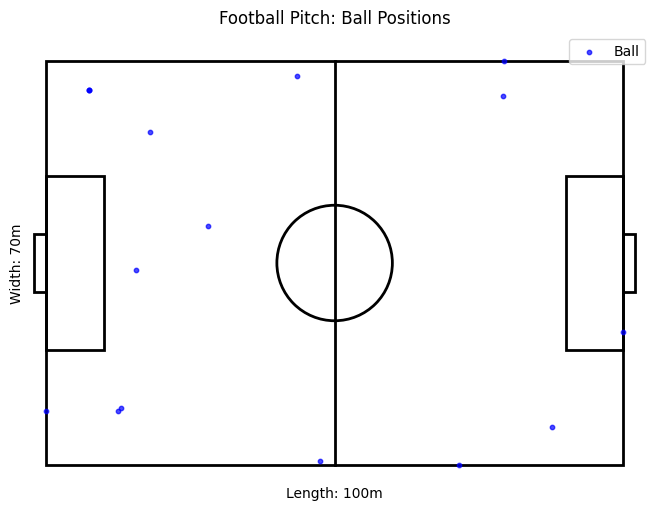

In [9]:
# Load the interpolated ball positions
ball_df = pd.read_csv("../data/results/ball_positions_interpolated.csv")

# Function to draw the football pitch
def draw_pitch(ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    # Pitch Outline
    pitch = patches.Rectangle([0, 0], 1, 0.7, edgecolor="black", facecolor="none", lw=2)
    ax.add_patch(pitch)
    
    # Center Circle
    center_circle = patches.Circle([0.5, 0.35], 0.1, edgecolor="black", facecolor="none", lw=2)
    ax.add_patch(center_circle)
    
    # Halfway Line
    ax.plot([0.5, 0.5], [0, 0.7], color="black", lw=2)
    
    # Penalty Areas
    penalty_area_left = patches.Rectangle([0, 0.2], 0.1, 0.3, edgecolor="black", facecolor="none", lw=2)
    penalty_area_right = patches.Rectangle([0.9, 0.2], 0.1, 0.3, edgecolor="black", facecolor="none", lw=2)
    ax.add_patch(penalty_area_left)
    ax.add_patch(penalty_area_right)
    
    # Goals
    goal_left = patches.Rectangle([-0.02, 0.3], 0.02, 0.1, edgecolor="black", facecolor="none", lw=2)
    goal_right = patches.Rectangle([1, 0.3], 0.02, 0.1, edgecolor="black", facecolor="none", lw=2)
    ax.add_patch(goal_left)
    ax.add_patch(goal_right)
    
    # Add field dimensions as labels
    ax.text(0.5, -0.05, "Length: 100m", ha="center", va="center", fontsize=10, color="black")
    ax.text(-0.05, 0.35, "Width: 70m", ha="center", va="center", fontsize=10, color="black", rotation=90)
        
    # Set limits and aspect
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 0.75)
    ax.set_aspect("equal")
    ax.axis("off")
    return ax

# Normalize positions to fit within the pitch dimensions
ball_df["pitch_ball_x"] = (ball_df["ball_x"] - ball_df["ball_x"].min()) / (ball_df["ball_x"].max() - ball_df["ball_x"].min())
ball_df["pitch_ball_y"] = (ball_df["ball_y"] - ball_df["ball_y"].min()) / (ball_df["ball_y"].max() - ball_df["ball_y"].min()) * 0.7

# Plot the football pitch and positions
ax = draw_pitch()
ax.scatter(ball_df["pitch_ball_x"], ball_df["pitch_ball_y"], color="blue", label="Ball", alpha=0.7, s=10)

# Add legend and title
ax.legend(loc="upper right")
ax.set_title("Football Pitch: Ball Positions")

plt.show()